<a href="https://colab.research.google.com/github/Flurbs222/Flurbs222/blob/main/dataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import os
#train_df_1 -> train_df_no_duplicates_no'?'
#train_df_2 -> train_df_no_duplicates_no'?'_removed_outliers
#train_df_3 -> train_df_no_duplicates_no'?'_cappedOutliers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Define the column names
cols= [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]
# Load the dataset
train_file_path = r'/content/train.csv'
test_file_path = r'/content/test.csv'

In [ ]:
train_df = pd.read_csv(train_file_path, names=cols)
train_df

,,,,,,,,,,,,,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,education,marital-status,sex,hours-per-week,income,capital_gain_binary,capital_loss_binary,workclass_0,workclass_1,workclass_2,workclass_3,occupation_0,occupation_1,occupation_2,occupation_3,relationship_0,relationship_1,relationship_2,race_0,race_1,race_2,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0.30136986301369856,9.0,4.0,1.0,0.39795918367346933,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.4520547945205479,9.0,2.0,1.0,0.12244897959183672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.2876712328767123,11.0,0.0,1.0,0.39795918367346933,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.4931506849315069,1.0,2.0,1.0,0.39795918367346933,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.136986301369863,7.0,2.0,0.0,0.37755102040816324,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.3150684931506849,11.0,2.0,1.0,0.39795918367346933,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.5616438356164384,11.0,6.0,0.0,0.39795918367346933,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.0684931506849315,11.0,4.0,1.0,0.19387755102040813,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_df = pd.read_csv(test_file_path, names=cols)
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
# List of numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols=train_df.select_dtypes(include='object').columns

print(numerical_cols)
print(categorical_cols)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_rediculousTest = train_df.map(lambda x: x.strip() if isinstance(x, str) else x)
df_rediculousTest = df_rediculousTest.replace("?", np.nan)
#print(df_rediculousTest.head(50))
print(df_rediculousTest.isnull().any())
print(df_rediculousTest.count())
print(df_rediculousTest.dropna().count())

###we can drop all the rows that have a null value (denoted with a question mark) and only lose

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool
age               32561
workclass         30725
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    31978
income            32561
dtype: int64
age               30162
workclass         30162
fnlwgt            30162
education         30162
education-num     30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital-gain   

In [ ]:
## Check for Weird entries within non-numerical columns
for col in cols:
    if train_df[col].dtypes!='float64' and train_df[col].dtypes!='int64':
        print(f'{train_df[col].value_counts()}\n')

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial   

In [ ]:
## Check for Weird entries within non-numerical columns
for col in cols:
    if test_df[col].dtypes!='float64' and test_df[col].dtypes!='int64':
        print(f'{test_df[col].value_counts()}\n')

workclass
Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: count, dtype: int64

education
HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: count, dtype: int64

marital-status
Married-civ-spouse       7403
Never-married            5434
Divorced                 2190
Widowed                   525
Separated                 505
Married-spouse-absent     210
Married-AF-spouse          14
Name: count, dtype: int64

occupation
Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales          

In [ ]:
#strip whitespace in TTrain set
for col in categorical_cols:
  train_df.loc[:,col]=train_df.loc[:,col].str.strip()

#rename the categorical cols

train_df.columns=train_df.columns.str.strip()

In [ ]:
#strip whitespace in Test set
for col in categorical_cols:
  test_df.loc[:,col]=test_df.loc[:,col].str.strip()

#rename the categorical cols

test_df.columns=test_df.columns.str.strip()

In [ ]:
# Check unique values with trimming
print("Unique values in train_df['workclass'] after stripping spaces:", train_df['workclass'].str.strip().unique())
print("Unique values in test_df['workclass'] after stripping spaces:", test_df['workclass'].str.strip().unique())

Unique values in train_df['workclass'] after stripping spaces: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in test_df['workclass'] after stripping spaces: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [ ]:
#inspect entries have weird value ('?')
row_with_question_mark = train_df[np.any(train_df.values == '?', axis=1)]
print('Number of rows that have at least 1 question mark:')
print(len(row_with_question_mark))
percentage = (len(row_with_question_mark) / len(train_df)) * 100
print(f'({percentage:.2f}% of the dataset train_df)')


Number of rows that have at least 1 question mark:
2399
(7.37% of the dataset train_df)


In [ ]:
# Alternatively, count occurrences of '?'
print("\nCount of '?' in train_df['workclass']:")
print(train_df['workclass'].str.count('\?').sum())  # Total number of '?' in train_df

print("\nCount of '?' in test_df['workclass']:")
print(test_df['workclass'].str.count('\=?').sum())  # Total number of '?' in test_df


Count of '?' in train_df['workclass']:
1836

Count of '?' in test_df['workclass']:
144637


In [ ]:
#inspect entries have weird value ('?')
row_with_question_mark = test_df[np.any(test_df.values == '?', axis=1)]
print('Number of rows that have at least 1 question mark:')
print(len(row_with_question_mark))
percentage = (len(row_with_question_mark) / len(test_df)) * 100
print(f'({percentage:.2f}% of the dataset test_df)')


Number of rows that have at least 1 question mark:
1221
(7.50% of the dataset test_df)


In [ ]:
#remove rows have '?'
train_df=train_df[~np.any(train_df.values=='?', axis=1)]
print(train_df.shape)
test_df=test_df[~np.any(test_df.values=='?', axis=1)]
print(test_df.shape)

(30162, 15)
(15060, 15)


In [ ]:
# Check unique values with trimming
print("Unique values in train_df['workclass'] after stripping spaces:", train_df['workclass'].str.strip().unique())
print("Unique values in test_df['workclass'] after stripping spaces:", test_df['workclass'].str.strip().unique())

Unique values in train_df['workclass'] after stripping spaces: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
Unique values in test_df['workclass'] after stripping spaces: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [ ]:
train_df.isnull().any()

,0
age,False
workclass,False
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False


In [ ]:
test_df.isnull().any()

,0
age,False
workclass,False
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,False
relationship,False
race,False
sex,False


In [ ]:
duplicates=train_df[train_df.duplicated(keep=False)]
display(duplicates)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
train_df_1=train_df.drop_duplicates()
train_df_1.shape

(30139, 15)

In [ ]:
# Check unique values with trimming
print("Unique values in train_df['workclass'] after stripping spaces:", train_df_1['workclass'].str.strip().unique())
print("Unique values in test_df['workclass'] after stripping spaces:", test_df['workclass'].str.strip().unique())

Unique values in train_df['workclass'] after stripping spaces: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
Unique values in test_df['workclass'] after stripping spaces: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [ ]:
threshold = 3

# Loop through each column and analyze outliers
for column in numerical_cols:
    # Compute mean and std
    mean = train_df_1[column].mean()
    std = train_df_1[column].std()

    # Compute bounds
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Compute Z-scores
    z_scores = (train_df_1[column] - mean) / std

    # Identify outliers
    lower_outliers = train_df_1[column][z_scores < -threshold]
    upper_outliers = train_df_1[column][z_scores > threshold]

    # Print the details
    print(f"Column: {column}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of < outliers: {len(lower_outliers)}")
    print(f"  Number of > outliers: {len(upper_outliers)}")
    print(f"  Number of remaining values: {len(train_df_1[column]) - len(lower_outliers) - len(upper_outliers)}")
    print("-" * 40)



Column: age
  Lower Bound: -0.9525578834207735
  Upper Bound: 77.83599794447125
  Number of < outliers: 0
  Number of > outliers: 119
  Number of remaining values: 30020
----------------------------------------
Column: fnlwgt
  Lower Bound: -127180.84704202472
  Upper Bound: 506770.8990012802
  Number of < outliers: 0
  Number of > outliers: 322
  Number of remaining values: 29817
----------------------------------------
Column: education-num
  Lower Bound: 2.4763169093240363
  Upper Bound: 17.76874762500026
  Number of < outliers: 193
  Number of > outliers: 0
  Number of remaining values: 29946
----------------------------------------
Column: capital-gain
  Lower Bound: -21134.490586510008
  Upper Bound: 23320.1729913675
  Number of < outliers: 0
  Number of > outliers: 198
  Number of remaining values: 29941
----------------------------------------
Column: capital-loss
  Lower Bound: -1124.8957879555344
  Upper Bound: 1301.7756446196574
  Number of < outliers: 0
  Number of > outlie

## Visualize outliers

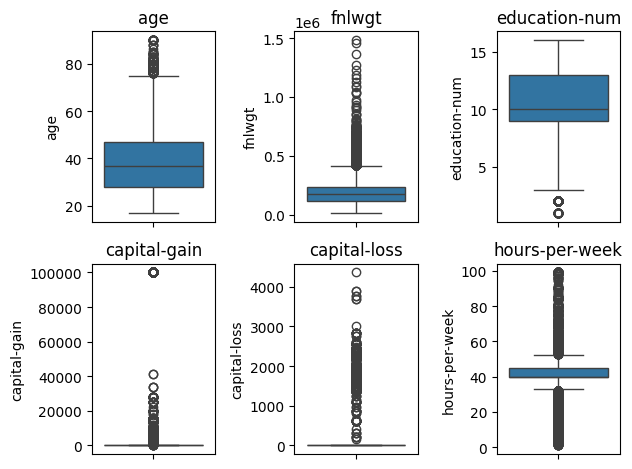

In [ ]:
# Create a grid of subplots
def sub_boxplot(df, categorical_cols=None):
  fig,axes = plt.subplots(nrows=2, ncols=3)
  # Flatten the axes array for easy iteration
  axes = axes.flatten()
  for i, col in enumerate(numerical_cols):
    if categorical_cols:
      # If a categorical column is specified, create boxplot by category
      sns.boxplot(ax=axes[i], x=df[categorical_cols], y=df[col], data=df)
      axes[i].set_title(f'{col} by {categorical_cols}')
    else:
      sns.boxplot(x=None, y=df[col], ax=axes[i])
      axes[i].set_title(f'{col}')
  plt.tight_layout()
sub_boxplot(train_df_1)

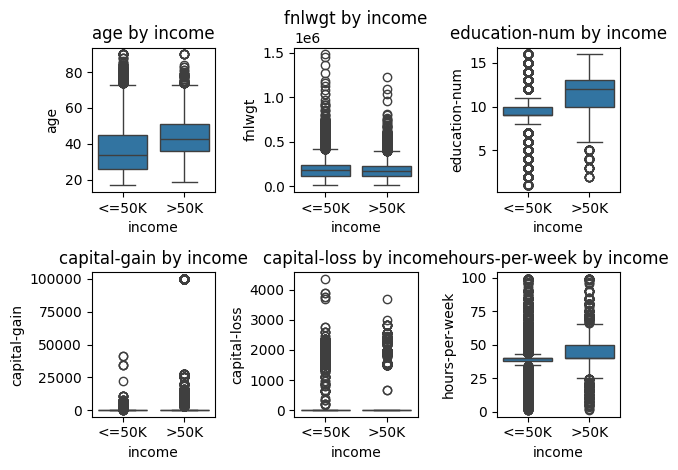

In [ ]:
# Boxplot' by income
sub_boxplot(train_df_1, categorical_cols='income')


Key Points from the Boxplots:

`Age by Income`:
- Individuals earning more than 50K tend to have a slightly higher median age.
- There are outliers on both sides for both groups, but particularly the >50K group has some high-age outliers.
- This suggests that while age is a relevant factor for income prediction, extreme age values (younger or older) might be outliers for certain models, especially if they are far from the median.
> Cap outliers to upper_limit

`fnlwgt (Final Weight) by Income`:
- fnlwgt shows a significant presence of outliers for both income groups, particularly the <=50K group.
- The range of values for fnlwgt is large, and the presence of outliers on both sides may indicate that this feature might need normalization or transformation before using it in a prediction model.
> Cap outliers to upper_limit

`Education-num by Income`:
- education-num shows a distinct pattern where the >50K group has generally higher values.
- There are some outliers on the lower end for <=50K, but overall the distribution looks more consistent in terms of education levels between the two income groups.
- Outliers here may represent individuals with atypical education, and their removal might not significantly impact the model unless they represent rare cases of higher income with lower education.
> Leave as it is

`Capital-gain by Income`:
- This feature exhibits substantial skew, with a large number of outliers, especially in the >50K group.
- The presence of high capital gains for high-income individuals is expected
> Cap outliers to upper_limit

`Capital-loss by Income`:
- Capital loss is predominantly concentrated at zero, with a small number of higher values, especially for the >50K group.
- There are outliers on both sides, but they seem to have less impact compared to capital gain.
> Cap outliers to upper_limit

`Hours-per-week by Income`:
- The distribution of hours-per-week shows a clear difference between the two income groups. The >50K group tends to work slightly more hours on average, but there are significant outliers in both groups, especially at high-hour values.
> Cap outliers to upper_limit

**Outlier Removal Strategy:**

IQR Method (Interquartile Range): For each feature, calculate the IQR and remove values that are outside the range of Q1 - 1.5*IQR and Q3 + 1.5*IQR.

**Target-Specific Approach:**
- Income is highly sensitive to outliers: High values of capital-gain and hours-per-week are directly correlated with higher income.
- Removing or capping outliers will help retain the structure of the data while preventing them from distorting the model.
- High-income individuals (the outliers) likely belong to the class of people making more than 50K, so  wouldn’t want to completely separate them out.
> Capping ensures that extreme values don't overwhelm the model, but you don’t lose information from high-income individuals.

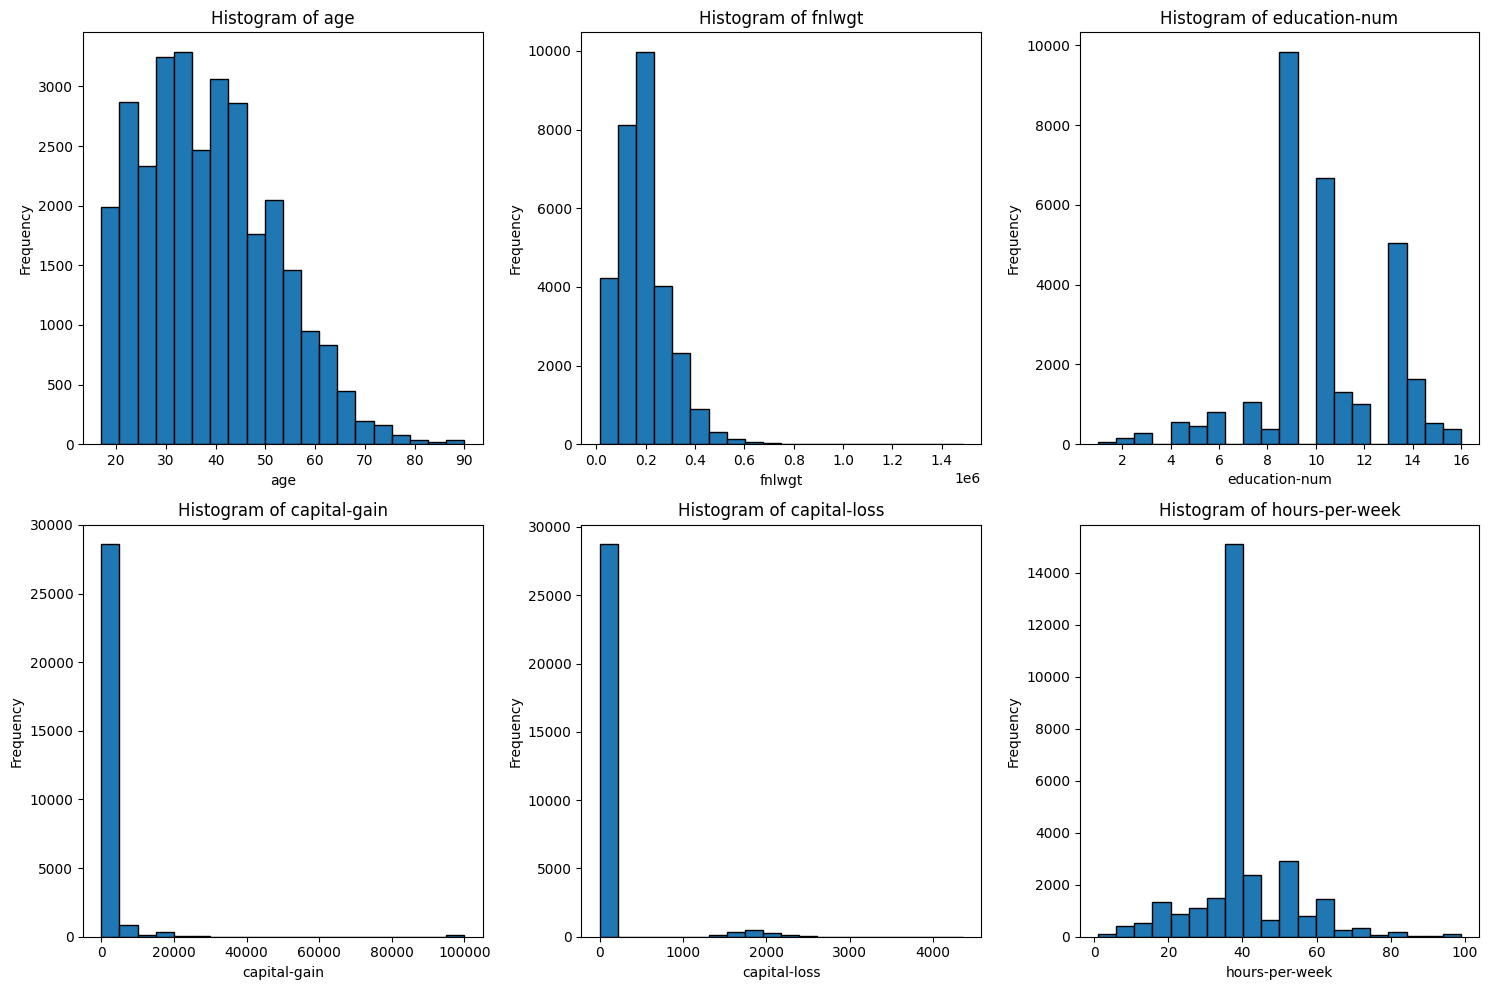

In [ ]:
def sub_histograms(df, numerical_cols):
    # Determine the layout of the subplots
    num_cols = len(numerical_cols)
    rows = (num_cols + 2) // 3  # Adjust for 3 plots per row
    cols = min(num_cols, 3)  # Limit columns to 3

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten for easy iteration

    # Plot histograms for each numerical column
    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

sub_histograms(train_df_1, numerical_cols)

In [ ]:
train_df_4 = train_df_1
train_df_4['income'] = train_df_4['income'].apply(lambda x: 1 if '>50K' in x else 0)


correlations = train_df_4[numerical_cols].corrwith(train_df_4['income'])
print(correlations)

age               0.242017
fnlwgt           -0.008992
education-num     0.335413
capital-gain      0.221204
capital-loss      0.150026
hours-per-week    0.229435
dtype: float64


<ipython-input-226-4c693c05d4ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_4['income'] = train_df_4['income'].apply(lambda x: 1 if '>50K' in x else 0)


In [ ]:
for col in numerical_cols:
    q1, q3 = train_df_1[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr  # change the threshold/multiplier if needed

    # Print calculated bounds
    print(f'{col}: Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}')
    print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

    # Identify and count outliers
    outliers = train_df_1[(train_df_1[col] < lower_bound) | (train_df_1[col] > upper_bound)]
    inliers = len(train_df_1) - outliers.shape[0]
    print(f'Amount of outliers in {col}: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}\n')

age: Q1 = 28.00, Q3 = 47.00, IQR = 19.00
Lower bound: -0.50, Upper bound: 75.50
Amount of outliers in age: 168, Amount of inliers: 29,971

fnlwgt: Q1 = 117627.50, Q3 = 237604.50, IQR = 119977.00
Lower bound: -62338.00, Upper bound: 417570.00
Amount of outliers in fnlwgt: 904, Amount of inliers: 29,235

education-num: Q1 = 9.00, Q3 = 13.00, IQR = 4.00
Lower bound: 3.00, Upper bound: 19.00
Amount of outliers in education-num: 193, Amount of inliers: 29,946

capital-gain: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Lower bound: 0.00, Upper bound: 0.00
Amount of outliers in capital-gain: 2,538, Amount of inliers: 27,601

capital-loss: Q1 = 0.00, Q3 = 0.00, IQR = 0.00
Lower bound: 0.00, Upper bound: 0.00
Amount of outliers in capital-loss: 1,427, Amount of inliers: 28,712

hours-per-week: Q1 = 40.00, Q3 = 45.00, IQR = 5.00
Lower bound: 32.50, Upper bound: 52.50
Amount of outliers in hours-per-week: 7,947, Amount of inliers: 22,192



## Option 1: Dropping Outliers

In [ ]:
# cols to check for outliers
outliers_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Function to remove outliers based on IQR method
def remove_outliers_iqr(df, cols):
    rows_before = len(df)
    train_df_2 = df.copy()  # Create a copy to clean

    for col in cols:
      q1, q3 = train_df_2[col].quantile([0.25, 0.75])
      iqr = q3 - q1
      lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Filter out rows where the column value is an outlier
      train_df_2 = train_df_2[(train_df_2[col] >= lower_bound) &  (train_df_2[col] <= upper_bound)]

    # Calculate the number of rows removed
    rows_after = len(train_df_2)
    rows_removed = rows_before - rows_after
    return train_df_2 , rows_removed

# Remove outliers from the specified cols
train_df_2, rows_removed = remove_outliers_iqr(train_df_1, outliers_cols)
print(f"Number of rows removed: {rows_removed}")


Number of rows removed: 11582


Since it's not good to remove a large chunk of data

In [ ]:
train_df_1.shape

(30139, 15)

In [ ]:
train_df_2.shape

(18557, 15)

## Option 2: Capping Outliers instead of dropping them

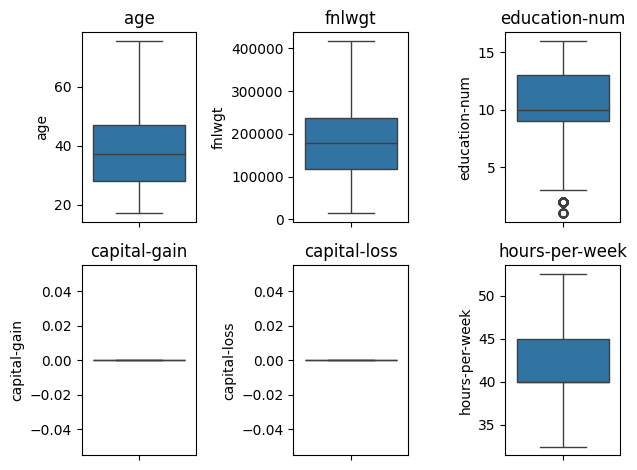

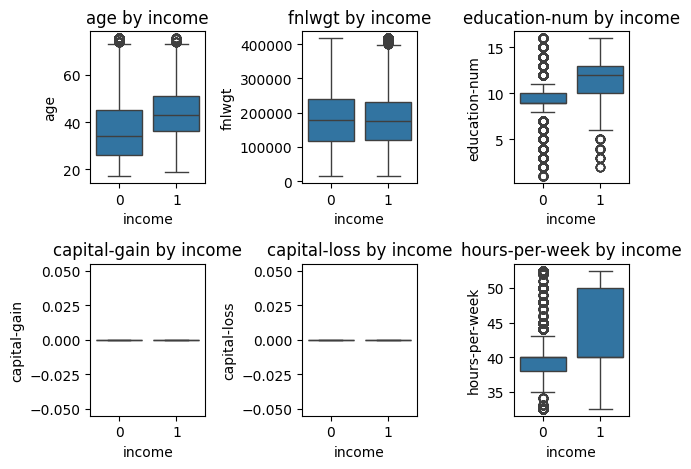

In [ ]:
def capping_outliers(df,cols):
  train_df_3=df.copy()
  for col in cols:
      q1, q3 = df[col].quantile([0.25, 0.75])
      iqr = q3 - q1
      lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
      train_df_3[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  return train_df_3

train_df_3=capping_outliers(train_df_1,outliers_cols)
sub_boxplot(train_df_3)
sub_boxplot(train_df_3, categorical_cols='income')

## Define target variable

In [ ]:
target_col='income'
if target_col not in train_df_3.columns:
  raise ValueError (f'target column {target_col} not found in dataset')

#Seperate features and target
x_train = train_df_3.drop(target_col, axis=1)
y_train = train_df_3[target_col]
x_test = test_df.drop(target_col, axis=1)
y_test = test_df[target_col]

print("Type of x_train:", type(x_train))
display(x_train)
print("Type of y_train:", type(y_train))
display(y_train)

Type of x_train: <class 'pandas.core.frame.DataFrame'>


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,32.5,United-States


Type of y_train: <class 'pandas.core.series.Series'>


,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


## Encoding Categorical Data

Let's start with encoding ordinal columns:

1) Education

2) Maritial Status

3) Class (Target column)

Generally for the ordinal columns (The categories have a logical order or ranking) we do the label encoding so we will follow that here too.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['education','marital-status']
for column in columns_to_encode:
  x_train[column] = label_encoder.fit_transform(x_train[column])

# let's just check the encoding
print(x_train[columns_to_encode].head())


   education  marital-status
0          9               4
1          9               2
2         11               0
3          1               2
4          9               2


I am little concerned about how the education and education-num might be the same thing so I ran some tests to find out they are same thing but encoded

Hence, we can remove the education column as it had already been label encoded and we did the normalization of that above

Let's have a look at the Nominal Column

* General rule of thumb for the nominal column encoding is to use the one hot encoding, but there are alot of categories in a column like "native-country"; upon using one-hot encoding there we will get alot of features as a resulting table

* did the chi-square test to see if there is strong relationship between my categorical features and the target variable "class"

* according to chi-square test if p-value is smaller (usually <0.05) then the feature has significant relationship else not

* Using that we can eliminate some features if we want to from the dataset

In [ ]:
from scipy.stats import chi2_contingency

categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country'
]

for column in categorical_columns:
  table = pd.crosstab(x_train[column],y_train)
  chi2,p_value,_,_ = chi2_contingency(table)
  print(column)
  print(f"chi-square-stats:{chi2}")
  print(f"P-value: {p_value}")

workclass
chi-square-stats:802.9821946035931
P-value: 3.4923450885547136e-170
education
chi-square-stats:4069.2800195218606
P-value: 0.0
marital-status
chi-square-stats:6054.658876679997
P-value: 0.0
occupation
chi-square-stats:3685.939984525825
P-value: 0.0
relationship
chi-square-stats:6227.14630539204
P-value: 0.0
race
chi-square-stats:304.51445353865375
P-value: 1.1506614060336783e-64
sex
chi-square-stats:1413.8027147469847
P-value: 2.104167256365847e-309
native-country
chi-square-stats:315.86165815564607
P-value: 1.4208131950940483e-44


This result shows that there is high association between all these categorical features and the target column "income"

In [ ]:
remaining_columns = ['workclass','native-country','race','sex','occupation','relationship']
for columns in remaining_columns:
  print(f"unique categories in {columns}")
  print(len(x_train[columns].unique()))

unique categories in workclass
7
unique categories in native-country
41
unique categories in race
5
unique categories in sex
2
unique categories in occupation
14
unique categories in relationship
6


Encoding used for each columns:

1) Sex - Label Encoding (only 2 categories available)

2) Rest of them - BinaryEncoding

Reason:

1) If we use one-hot encoding we might end up with dimensionality-curse

2) If we use mean-encoding we might face some data leakage

3) To maintain consistency in the pipeline and hopefully better result

In [ ]:
x_train['sex'] = label_encoder.fit_transform(x_train['sex'])


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

remaining_columns = ['workclass','native-country','race','occupation','relationship']

encoder = ce.BinaryEncoder(cols=remaining_columns)

x_train_encoded = encoder.fit_transform(x_train)

x_train_encoded.head()


,age,workclass_0,workclass_1,workclass_2,fnlwgt,education,education-num,marital-status,occupation_0,occupation_1,...,sex,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,39.0,0,0,1,77516,9,13,4,0,0,...,1,0,0,40.0,0,0,0,0,0,1
1,50.0,0,1,0,83311,9,13,2,0,0,...,1,0,0,32.5,0,0,0,0,0,1
2,38.0,0,1,1,215646,11,9,0,0,0,...,1,0,0,40.0,0,0,0,0,0,1
3,53.0,0,1,1,234721,1,7,2,0,0,...,1,0,0,40.0,0,0,0,0,0,1
4,28.0,0,1,1,338409,9,13,2,0,1,...,0,0,0,40.0,0,0,0,0,1,0


In [ ]:
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30139 non-null  float64
 1   workclass_0       30139 non-null  int64  
 2   workclass_1       30139 non-null  int64  
 3   workclass_2       30139 non-null  int64  
 4   fnlwgt            30139 non-null  int64  
 5   education         30139 non-null  int64  
 6   education-num     30139 non-null  int64  
 7   marital-status    30139 non-null  int64  
 8   occupation_0      30139 non-null  int64  
 9   occupation_1      30139 non-null  int64  
 10  occupation_2      30139 non-null  int64  
 11  occupation_3      30139 non-null  int64  
 12  relationship_0    30139 non-null  int64  
 13  relationship_1    30139 non-null  int64  
 14  relationship_2    30139 non-null  int64  
 15  race_0            30139 non-null  int64  
 16  race_1            30139 non-null  int64  
 17

In [ ]:
x_train_encoded = x_train_encoded.drop(columns=['education'])
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               30139 non-null  float64
 1   workclass_0       30139 non-null  int64  
 2   workclass_1       30139 non-null  int64  
 3   workclass_2       30139 non-null  int64  
 4   fnlwgt            30139 non-null  int64  
 5   education-num     30139 non-null  int64  
 6   marital-status    30139 non-null  int64  
 7   occupation_0      30139 non-null  int64  
 8   occupation_1      30139 non-null  int64  
 9   occupation_2      30139 non-null  int64  
 10  occupation_3      30139 non-null  int64  
 11  relationship_0    30139 non-null  int64  
 12  relationship_1    30139 non-null  int64  
 13  relationship_2    30139 non-null  int64  
 14  race_0            30139 non-null  int64  
 15  race_1            30139 non-null  int64  
 16  race_2            30139 non-null  int64  
 17

Let's repeat the same process for the x_test_normalized

In [ ]:
remaining_columns = ['workclass','native-country','race','sex','occupation','relationship']
for columns in remaining_columns:
  print(f"unique categories in {columns}")
  print(len(x_test[columns].unique()))

unique categories in workclass
7
unique categories in native-country
40
unique categories in race
5
unique categories in sex
2
unique categories in occupation
14
unique categories in relationship
6


In [ ]:
#label encoding
columns_to_encode = ['education','marital-status','sex']
for column in columns_to_encode:
  x_test[column] = label_encoder.fit_transform(x_test[column])

#binary encoding
remaining_columns = ['workclass','native-country','race','occupation','relationship']

# encoder = ce.BinaryEncoder(cols=remaining_columns)

x_test_encoded = encoder.fit_transform(x_test)

x_test_encoded = x_test_encoded.drop(columns=['education'])

x_test_encoded.head()


,age,workclass_0,workclass_1,workclass_2,fnlwgt,education-num,marital-status,occupation_0,occupation_1,occupation_2,...,sex,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,25,0,0,1,226802,7,4,0,0,0,...,1,0,0,40,0,0,0,0,0,1
1,38,0,0,1,89814,9,2,0,0,1,...,1,0,0,50,0,0,0,0,0,1
2,28,0,1,0,336951,12,2,0,0,1,...,1,0,0,40,0,0,0,0,0,1
3,44,0,0,1,160323,10,2,0,0,0,...,1,7688,0,40,0,0,0,0,0,1
5,34,0,0,1,198693,6,4,0,1,0,...,1,0,0,30,0,0,0,0,0,1


In [ ]:
print("training_Data_shape : ", x_train_encoded.shape)
print("testing_data_shape : ",x_test_encoded.shape)

training_Data_shape :  (30139, 27)
testing_data_shape :  (15060, 27)


In [ ]:
(x_train_encoded['capital-gain'].unique())

array([0])

In [ ]:
(x_test_encoded['capital-gain'].unique())

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036])

Now the question is do we need to normalize the categorical columns nor not?

* it is based on the model we develop for example: the tree based models are not sensitive to the feature's scale so if we are building decision tree or random forest and probability based model like naive bayes then we don't need to do the feature scaling explicitely

* but if we are building linear model like logistic regression and the distance based model like knn then we might need to do the normalization of these features too,

* so whoever is building whichever model will do whatever the method is needed

## check for data imbalance for `x_train_encoded` and `y_train`

In [ ]:
# Count class occurrences
value_counts = y_train.value_counts()
print(value_counts)

# Calculate percentages
value_percentages = y_train.value_counts(normalize=True) * 100
print(value_percentages)

#check ratio
ratio=value_counts.max()/value_counts.min()
print(f'Class Imbalance Ratio: {ratio:.2f}')


income
0    22633
1     7506
Name: count, dtype: int64
income
0    75.095391
1    24.904609
Name: proportion, dtype: float64
Class Imbalance Ratio: 3.02


- This means there are 3 times as many instances of class 0 compared to class 1.
- SMOTE: synthetic examples are generated for the minority class to balance the dataset.

In [ ]:
#handle imbalanced data
smote=SMOTE(sampling_strategy='auto',random_state=42)
x_train_encoded_res, y_train_res=smote.fit_resample(x_train_encoded,y_train)

In [ ]:
# Count class occurrences
value_counts = y_train_res.value_counts()
print(value_counts)

# Calculate percentages
value_percentages = y_train_res.value_counts(normalize=True) * 100
print(value_percentages)

#check ratio
ratio=value_counts.max()/value_counts.min()
print(f'Class Imbalance Ratio after SMOTE: {ratio:.2f}')

income
0    22633
1    22633
Name: count, dtype: int64
income
0    50.0
1    50.0
Name: proportion, dtype: float64
Class Imbalance Ratio after SMOTE: 1.00


##Data Normalization for Numerical cols

In [ ]:
def normalization(x_train, x_test, numerical_cols):
  for col in numerical_cols:
    scaler = MinMaxScaler()
    #fit the scaler on the training data only and transform both training and test data

    #Reshape column data into 2D for scaler
    x_train_col = x_train_encoded_res[[col]].values  # Extract column as a 2D array
    x_test_col = x_test_encoded[[col]].values    # Extract column as a 2D array

    #The .fit method expects 2D data/array (a matrix with rows and columns)
    scaler.fit(x_train_col)
    x_train_encoded_res[col] = scaler.transform(x_train_col)
    x_test_encoded[col] = scaler.transform(x_test_col)
  return x_train, x_test

x_train_encoded_res_normalized, x_test_normalized = normalization(x_train_encoded_res, x_test_encoded, numerical_cols)
print(f'Normalized x_train: {x_train_encoded_res_normalized}\n')
print(f'Normalized x_test: {x_test_normalized}')



Normalized x_train:             age  workclass_0  workclass_1  workclass_2    fnlwgt  \
0      0.376068            0            0            1  0.157867   
1      0.564103            0            1            0  0.172218   
2      0.358974            0            1            1  0.499942   
3      0.615385            0            1            1  0.547180   
4      0.188034            0            1            1  0.803960   
...         ...          ...          ...          ...       ...   
45261  0.456576            0            0            1  0.347533   
45262  0.285026            0            1            1  0.609300   
45263  0.325497            0            1            1  0.173660   
45264  0.492025            1            0            1  0.447260   
45265  0.463763            0            1            0  1.000000   

       education-num  marital-status  occupation_0  occupation_1  \
0           0.800000               4             0             0   
1           0.800000       

In [ ]:
train_df = pd.concat([x_train_encoded_res_normalized, y_train_res], axis=1)
display(train_df.head())
train_df.shape

,age,workclass_0,workclass_1,workclass_2,fnlwgt,education-num,marital-status,occupation_0,occupation_1,occupation_2,...,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,income
0,0.376068,0,0,1,0.157867,0.800000,4,0,0,0,...,0.0,0.0,0.375,0,0,0,0,0,1,0
1,0.564103,0,1,0,0.172218,0.800000,2,0,0,1,...,0.0,0.0,0.000,0,0,0,0,0,1,0
2,0.358974,0,1,1,0.499942,0.533333,0,0,0,1,...,0.0,0.0,0.375,0,0,0,0,0,1,0
3,0.615385,0,1,1,0.547180,0.400000,2,0,0,1,...,0.0,0.0,0.375,0,0,0,0,0,1,0
4,0.188034,0,1,1,0.803960,0.800000,2,0,1,0,...,0.0,0.0,0.375,0,0,0,0,1,0,0


(45266, 28)

In [ ]:
y_train_res

,income
0,0
1,0
2,0
3,0
4,0
...,...
45261,1
45262,1
45263,1
45264,1


In [ ]:
y_test = y_test.apply(lambda x: 1 if '>50K' in x else 0)

In [ ]:
y_test

,income
0,0
1,0
2,1
3,1
5,0
...,...
16275,0
16276,0
16278,0
16279,0


In [ ]:
test_df = pd.concat([x_test_encoded, y_test], axis=1)
display(test_df.head())
test_df.shape

,age,workclass_0,workclass_1,workclass_2,fnlwgt,education-num,marital-status,occupation_0,occupation_1,occupation_2,...,capital-gain,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,income
0,0.136752,0,0,1,0.527569,0.400000,4,0,0,0,...,0.0,0.0,0.375,0,0,0,0,0,1,0
1,0.358974,0,0,1,0.188323,0.533333,2,0,0,1,...,0.0,0.0,0.875,0,0,0,0,0,1,0
2,0.188034,0,1,0,0.800350,0.733333,2,0,0,1,...,0.0,0.0,0.375,0,0,0,0,0,1,1
3,0.461538,0,0,1,0.362936,0.600000,2,0,0,0,...,7688.0,0.0,0.375,0,0,0,0,0,1,1
5,0.290598,0,0,1,0.457958,0.333333,4,0,1,0,...,0.0,0.0,-0.125,0,0,0,0,0,1,0


(15060, 28)

In [ ]:
for col in test_df.columns:
  if col not in train_df.columns:
    print(col)

In [ ]:
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Files saved as 'train_data.csv' and 'test_data.csv'.")
print("Current working directory:", os.getcwd())

Files saved as 'train_data.csv' and 'test_data.csv'.
Current working directory: /content


In [ ]:
for columns in x_train_normalized.columns:
  if x_train_normalized[columns].dtype == 'object':
    print(columns)
    print(x_train_normalized[columns].unique())



NameError: name 'x_train_normalized' is not defined